In [1]:
from run_kinfit import run_kinfit
from draw_funcs import draw_1d_hist, draw_1d_hists, vertices_plot2, draw_2d_hist, draw_scatter
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
input_path = "/var/kinfit/data/tr_ph_run059700.root"
output_path = "kinfit_run059700.root"

In [3]:
run_kinfit(input_path, output_path=output_path, mfield=1.0)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run059700.root Title: 
(TrPh &) @0x7f329fdcb000
 [STATUS : 01%]	CPU TIME: 11.940	REAL TIME: 11.981
 [STATUS : 02%]	CPU TIME: 12.370	REAL TIME: 12.366
 [STATUS : 03%]	CPU TIME: 11.620	REAL TIME: 11.625
 [STATUS : 04%]	CPU TIME: 10.880	REAL TIME: 10.909
 [STATUS : 05%]	CPU TIME: 11.670	REAL TIME: 11.675
 [STATUS : 06%]	CPU TIME: 11.840	REAL TIME: 11.860
 [STATUS : 07%]	CPU TIME: 12.010	REAL TIME: 12.013
 [STATUS : 08%]	CPU TIME: 12.450	REAL TIME: 12.465
 [STATUS : 09%]	CPU TIME: 12.120	REAL TIME: 12.130
 [STATUS : 10%]	CPU TIME: 11.740	REAL TIME: 11.748
 [STATUS : 11%]	CPU TIME: 12.490	REAL TIME: 12.526
 [STATUS : 12%]	CPU TIME: 12.060	REAL TIME: 12.072
 [STATUS : 13%]	CPU TIME: 12.260	REAL TIME: 12.254
 [STATUS : 14%]	CPU TIME: 11.340	REAL TIME: 11.367
 [STATUS : 15%]	CPU TIME: 11.640	REAL TIME: 11.643
 [STATUS : 16%]	CPU TIME: 12.270	REAL TIME: 12.260
 [STATUS : 17%]	CPU TIME: 12.440	REAL TIME: 12.444
 [STATUS : 18%]	CPU TIME: 11.400	REAL 

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/KsKpi_4pi/TrPh_C.so


In [4]:
fl = TFile.Open(output_path, 'read')

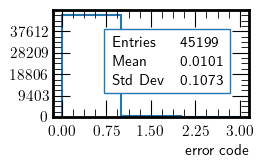

In [23]:
fl.kf_data.Draw("kf_err>>kf_err_kskpi(3,0,3)", "", "goff")
draw_1d_hist("kf_err_kskpi", 
             xlabel='error code',
            fraction=0.47,
            info_coords=(0.3, 0.3))
plt.savefig('kf_err_4pi_xkpi.eps')

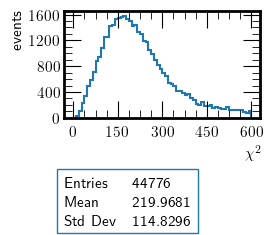

In [6]:
fl.kf_data.Draw("kf_chi2>>kf_chi2_kskpi(64,0,600)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2_kskpi", 
             xlabel=r'$\chi^2$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
            h_y=400, h_x=150)
plt.savefig('kf_chi2_4pi_xkpi.eps',  bbox_inches='tight')

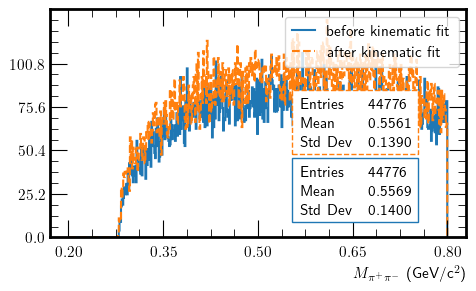

In [7]:
fl.kf_data.Draw("in_mks>>in_mks(512,0.2,0.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mks>>kf_mks(512,0.2,0.8)", "kf_err==0", "goff")
draw_1d_hists([('in_mks', 'before kinematic fit'), ('kf_mks', 'after kinematic fit')], xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)')

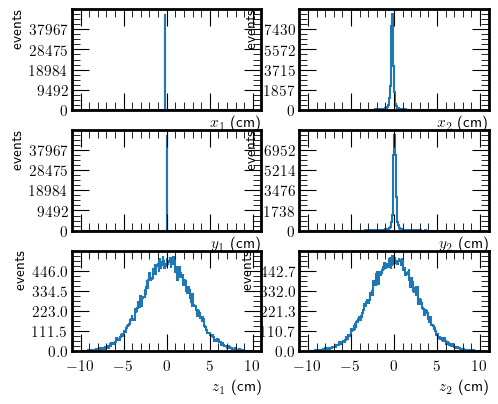

In [8]:
fl.kf_data.Draw("kf_vtx0[0]>>kf_vtx0_x(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx0[1]>>kf_vtx0_y(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx0[2]>>kf_vtx0_z(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[0]>>kf_vtx1_x(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[1]>>kf_vtx1_y(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[2]>>kf_vtx1_z(256, -10, 10)", "", "goff")
vertices_plot2([['kf_vtx0_x', 'kf_vtx1_x'], 
               ['kf_vtx0_y', 'kf_vtx1_y'],
               ['kf_vtx0_z', 'kf_vtx1_z']],
                info_coords=(0.6, 0.6))

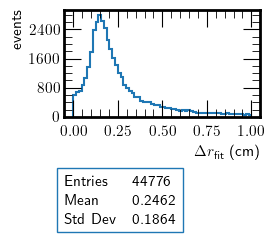

In [9]:
fl.kf_data.Draw("kf_vtx_dr>>kf_vtx_dr(64, 0, 1)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dr", 
             xlabel=r'$\Delta r_{\text{fit}}$ (cm)',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
            h_y=800, h_x=0.25)
plt.savefig('kf_vtx_dr_4pi_xkpi.eps', bbox_inches='tight')

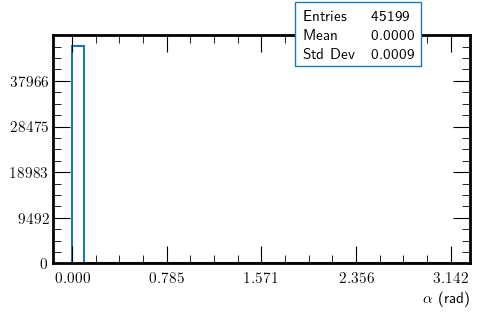

In [10]:
fl.kf_data.Draw("kf_ks_decay_prod_angle>>kf_angle(32, 0, 3.14159)", "", "goff")
draw_1d_hist("kf_angle", xlabel=r'$\alpha$ (rad)')
plt.savefig('kf_ks_prod_angle_kskpi.eps')

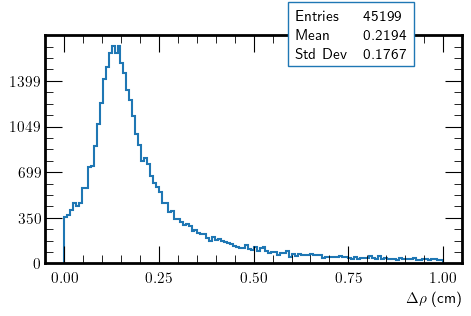

In [11]:
fl.kf_data.Draw("kf_vtx_drho>>kf_vtx_drho(128, 0, 1)", "", "goff")
draw_1d_hist("kf_vtx_drho", xlabel=r'$\Delta\rho$ (cm)')
plt.savefig('kf_vtx_drho_kskpi.eps')

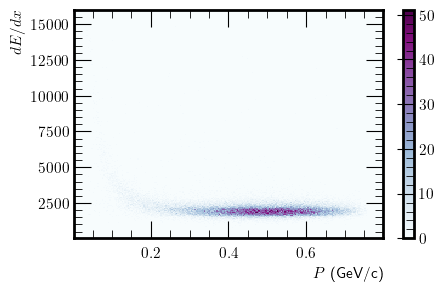

In [12]:
fl.kf_data.Draw("kf_dedx_vtx0_K:kf_p_vtx0_K>>pdedx_K(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_K', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx$')

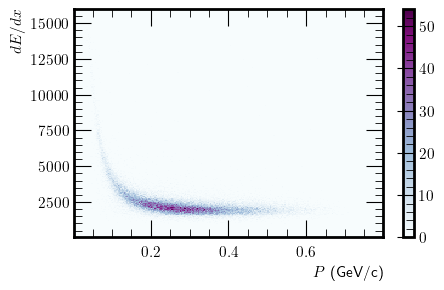

In [13]:
fl.kf_data.Draw("kf_dedx_vtx0_pi:kf_p_vtx0_pi>>pdedx_vtx0_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx0_pi', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx$')

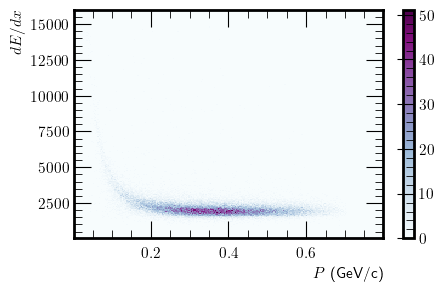

In [14]:
fl.kf_data.Draw("kf_dedx_vtx1_pi[0]:kf_p_vtx1_pi[0]>>pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_dedx_vtx1_pi[1]:kf_p_vtx1_pi[1]>>+pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx1_pi', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx$')

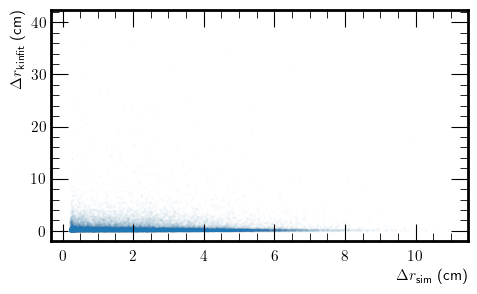

In [15]:
fl.kf_data.Draw(">>elist", "kf_err==0", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', xlabel=r'$\Delta r_{\text{sim}}$ (cm)', ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)')
plt.savefig('kf_sim_vs_kf_dr.eps')

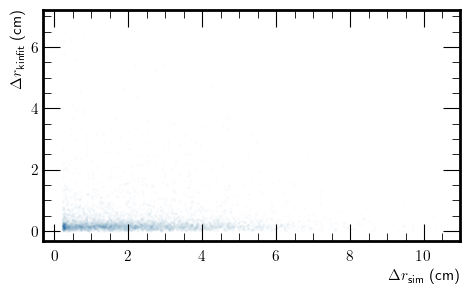

In [16]:
fl.kf_data.Draw(">>elist", "kf_err==0 && kf_chi2<100", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', xlabel=r'$\Delta r_{\text{sim}}$ (cm)', ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)')
plt.savefig('kf_sim_vs_kf_dr_chi2_100.eps')

In [17]:
# fl.Close()